### **Nama: Muhammad Amanda**
### **Username: muh_amanda** 
### **Kota: Kota Jakarta Timur, DKI Jakarta**
### *Waktu bergabung pada 12 May 2020*

# Proyek Pertama : Membuat Model NLP dengan TensorFlow

Dataset : [Depression and Anxiety in Twitter (ID)](https://www.kaggle.com/stevenhans/depression-and-anxiety-in-twitter-id)

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [77]:
%cd /content

/content


In [78]:
!kaggle datasets download -d stevenhans/depression-and-anxiety-in-twitter-id

  0% 0.00/352k [00:00<?, ?B/s]
100% 352k/352k [00:00<00:00, 52.9MB/s]


In [79]:
!ls

 datd_rand.csv
 datd_test.csv
 datd_train.csv
'depression-and-anxiety-in-twitter-id?select=datd_rand.csv'
 depression-and-anxiety-in-twitter-id.zip
 drive
 kaggle.json
 sample_data


In [80]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  depression-and-anxiety-in-twitter-id.zip
replace datd_rand.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Import Dataset**

file data yang digunakan datd_train.csv dengan 2000+ baris dan 2 label/kelas.

In [81]:
import pandas as pd
df = pd.read_csv('datd_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2201 non-null   object
 1   label   2201 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.5+ KB


# **one-hot-encoding**

label kita berupa data kategorikal, maka kita perlu melakukan proses one-hot-encoding dan membuat dataframe baru.

In [82]:

category = pd.get_dummies(df["label"])
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='label')
df_baru.head()

,text,0,1
0,"oh pantesan tadi pada rame, ternyata monek mau...",1,0
1,"Semakin bertambah usia, semakin cemas hidup.",1,0
2,gelisah bgt astaga,0,1
3,Udah jangan terlalu cemas sikapku tak berubah ...,1,0
4,Giliran Aldebaran diambang kematian...Semua ba...,1,0


In [83]:
# mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array
tweet = df_baru['text'].values
label = df_baru[[0,1]].values

# Split Dataset

membagi dataset menjadi data train (80%) dan data test (20%).

In [84]:
from sklearn.model_selection import train_test_split
tweet_latih, tweet_test, label_latih, label_test = train_test_split(tweet, label, test_size=0.2, stratify=label, random_state=42)

# **Tokenisasi**

In [85]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tweet_latih) 
tokenizer.fit_on_texts(tweet_test)

# **Sekuens**

In [86]:
sekuens_latih = tokenizer.texts_to_sequences(tweet_latih)
sekuens_test = tokenizer.texts_to_sequences(tweet_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)



# **Arsitektur model**
* menggunakan Embedding.
* menggunakan LSTM.
* menggunakan model sequential.
* mengimplementasikan callback.

In [90]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## membuat kelas callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.76) and (logs.get('val_accuracy')>0.76):
      print("\nAkurasi telah mencapai >75%!") #untuk ditampilkan ketika callback aktif.
      self.model.stop_training = True
callbacks = myCallback()

num_epochs = 200
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2,
                    callbacks=[callbacks],
                    batch_size=40,
                    steps_per_epoch=40)

Epoch 1/200
40/40 - 3s - loss: 0.6389 - accuracy: 0.6650 - val_loss: 0.6136 - val_accuracy: 0.6667
Epoch 2/200
40/40 - 1s - loss: 0.5513 - accuracy: 0.7050 - val_loss: 0.5235 - val_accuracy: 0.7551
Epoch 3/200
40/40 - 1s - loss: 0.3699 - accuracy: 0.8625 - val_loss: 0.6785 - val_accuracy: 0.7778

Akurasi telah mencapai >75%!


# **Plot loss dan akurasi**

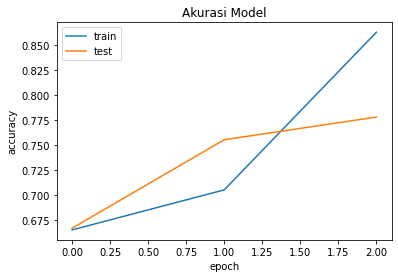

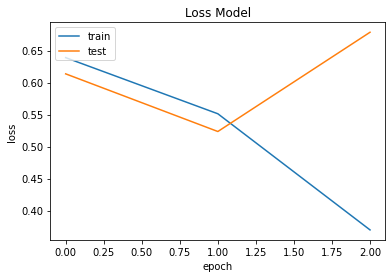

In [91]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
model.evaluate(padded_test, label_test)

14/14 [==============================] - 0s 10ms/step - loss: 0.6785 - accuracy: 0.7778


[0.6785212159156799, 0.7777777910232544]